## Описание данных
Данный проект посвящён анализу данных о популярных видео с платформы YouTube в российском сегменте (RUvideos.csv). YouTube, как одна из крупнейших видеоплатформ, формирует список наиболее популярных видео, основываясь на взаимодействии пользователей. Список трендов учитывает такие метрики, как количество просмотров, лайков, дизлайков, комментариев и время публикации, а также другие показатели.
## Основные характеристики набора данных:
* Источник: Данные представляют ежедневные записи трендовых видео YouTube, отобранные для российского региона (RU). Они фиксируют до 200 трендовых видео в день.
* Период охвата: Несколько месяцев записей трендов для российских пользователей YouTube.
* Метрики вовлечённости: Просмотры, лайки, дизлайки и комментарии, отражающие реакцию аудитории на контент.
* Категории видео
* Поля данных:
  * video_id: Уникальный идентификатор видео.
  * trending_date: Дата, когда видео стало трендовым.
  * title: Название видео.
  * channel_title: Название канала.
  * category_id: Идентификатор категории видео
  * publish_time: Время публикации видео.
  * tags: Теги, указанные автором видео.
  * views: Количество просмотров.
  * likes: Количество лайков.
  * dislikes: Количество дизлайков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

/Users/a123/bmstu/mlt/MLT_course/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/a123/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


In [3]:
import os

print(os.listdir(path))

['IN_category_id.json', 'MXvideos.csv', 'RU_category_id.json', 'JP_category_id.json', 'FR_category_id.json', 'INvideos.csv', 'GB_category_id.json', 'DEvideos.csv', 'JPvideos.csv', 'KR_category_id.json', 'KRvideos.csv', 'CAvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'FRvideos.csv', 'CA_category_id.json', 'US_category_id.json', 'DE_category_id.json', 'USvideos.csv', 'GBvideos.csv']


In [4]:
full_path = path + '/RUvideos.csv'

In [5]:
df = pd.read_csv(full_path, encoding='latin1') # небольшие проблемы с кодировкой, попробовали все

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,24,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...


In [8]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [9]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2463
dtype: int64

In [10]:
df = df.drop(columns=['title', 'channel_title', 'tags', 'thumbnail_link', 'description'])

In [11]:
df

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,gDuslQ9avLc,17.14.11,22,2017-11-13T09:09:31.000Z,62408,334,190,50,False,False,False
1,AOCJIFEA_jE,17.14.11,22,2017-11-13T17:32:11.000Z,330043,43841,2244,2977,False,False,False
2,VAWNQDgwwOM,17.14.11,24,2017-11-13T16:11:31.000Z,424596,49854,714,2944,False,False,False
3,gknkFwKQfHg,17.14.11,22,2017-11-13T06:51:10.000Z,112851,3566,122,80,False,False,False
4,3sYvZcwzZr8,17.14.11,24,2017-11-13T16:52:36.000Z,243469,36216,631,1692,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,22,2018-06-13T13:47:01.000Z,129488,5893,164,990,False,False,False
40735,tX7p7NtNVDE,18.14.06,23,2018-06-12T09:38:38.000Z,99163,4659,337,692,False,False,False
40736,KAyj5Xm1C64,18.14.06,24,2018-06-13T12:51:23.000Z,449611,24808,93,974,False,False,False
40737,4PiSLIrsSiY,18.14.06,22,2018-06-13T00:23:33.000Z,14225,793,39,209,False,False,False


In [12]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [13]:
boolean_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
df[boolean_columns] = df[boolean_columns].astype(int)

In [14]:
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40693,40693.000000,4.069300e+04,4.069300e+04,40693.000000,40693.000000,40693.000000,40693.000000,40693.000000
mean,2018-02-26 17:38:55.094487808,20.261396,2.388132e+05,1.230294e+04,1469.280073,1749.275281,0.026049,0.024722,0.000246
min,2017-11-14 00:00:00,1.000000,1.170000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-03 00:00:00,20.000000,2.255800e+04,4.020000e+02,31.000000,73.000000,0.000000,0.000000,0.000000
50%,2018-02-25 00:00:00,22.000000,6.620100e+04,1.875000e+03,128.000000,309.000000,0.000000,0.000000,0.000000
75%,2018-04-23 00:00:00,25.000000,1.946990e+05,7.767000e+03,583.000000,1103.000000,0.000000,0.000000,0.000000
max,2018-06-14 00:00:00,43.000000,6.279639e+07,4.470923e+06,884967.000000,905925.000000,1.000000,1.000000,1.000000
std,NaN,7.890533,8.816841e+05,5.620402e+04,8562.012754,10343.058589,0.159282,0.155278,0.015674


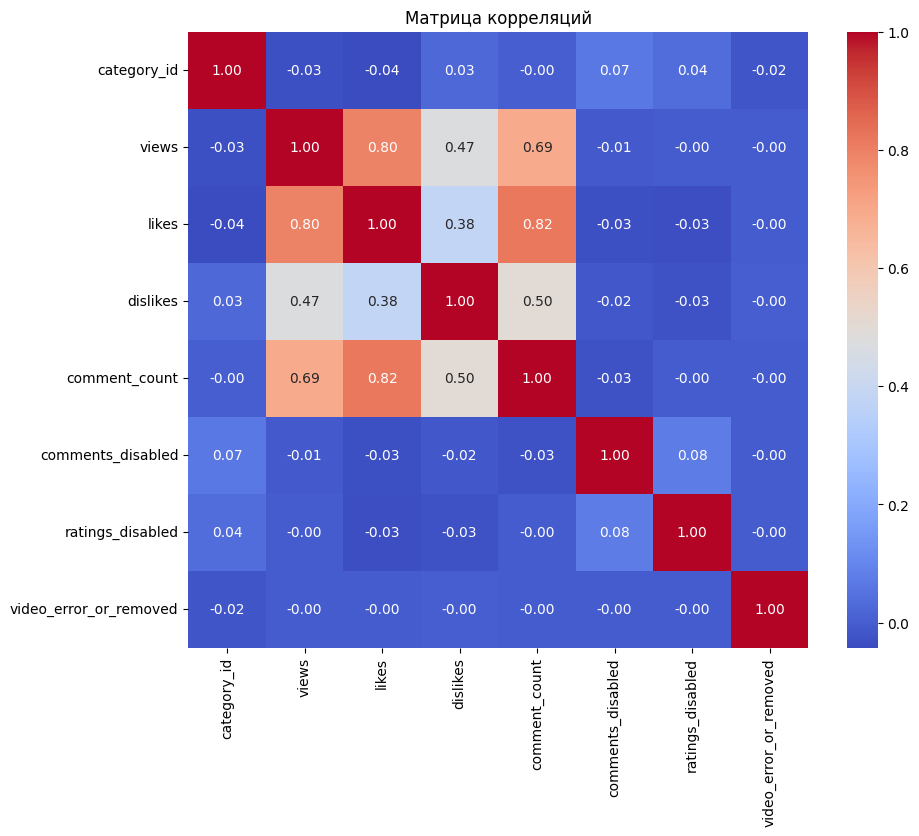

In [15]:
nums = df.select_dtypes(include=['number']).columns
correlation_matrix = df[nums].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Сильные положительные корреляции между views, likes, и comment_count, что указывает на их взаимосвязь. Видео с большим числом просмотров, как правило, получают больше лайков и комментариев.
dislikes также имеет умеренную положительную корреляцию с views, что логично, так как видео с большим охватом получают больше и лайков, и дизлайков.
Булевые флаги, такие как comments_disabled и ratings_disabled, показывают слабую или отрицательную корреляцию с другими показателями, поскольку они указывают на наличие ограничений на взаимодействие.

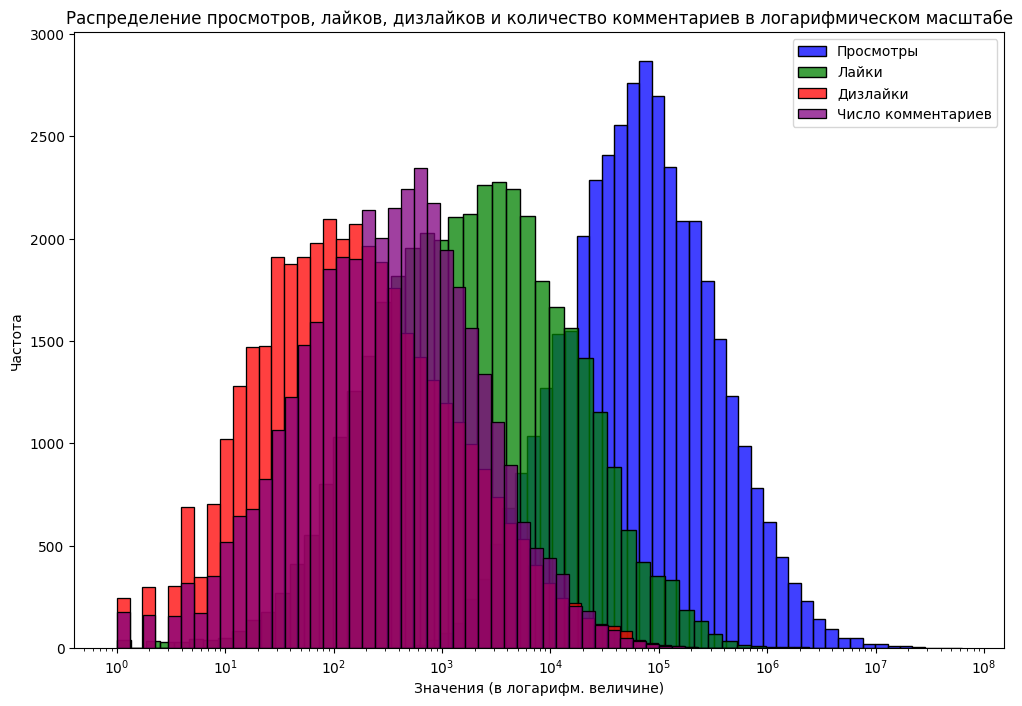

In [16]:

plt.figure(figsize=(12, 8))
sns.histplot(df['views'], bins=50, log_scale=(True, False), label='Просмотры', color='blue')
sns.histplot(df['likes'], bins=50, log_scale=(True, False), label='Лайки', color='green')
sns.histplot(df['dislikes'], bins=50, log_scale=(True, False), label='Дизлайки', color='red')
sns.histplot(df['comment_count'], bins=50, log_scale=(True, False), label='Число комментариев', color='purple')
plt.title('Распределение просмотров, лайков, дизлайков и количество комментариев в логарифмическом масштабе')
plt.xlabel('Значения (в логарифм. величине)')
plt.ylabel('Частота')
plt.legend()
plt.show()


In [17]:
df.comments_disabled.value_counts()

comments_disabled
0    39633
1     1060
Name: count, dtype: int64

In [18]:
df.head()

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,gDuslQ9avLc,2017-11-14,22,2017-11-13 09:09:31+00:00,62408,334,190,50,0,0,0
1,AOCJIFEA_jE,2017-11-14,22,2017-11-13 17:32:11+00:00,330043,43841,2244,2977,0,0,0
2,VAWNQDgwwOM,2017-11-14,24,2017-11-13 16:11:31+00:00,424596,49854,714,2944,0,0,0
3,gknkFwKQfHg,2017-11-14,22,2017-11-13 06:51:10+00:00,112851,3566,122,80,0,0,0
4,3sYvZcwzZr8,2017-11-14,24,2017-11-13 16:52:36+00:00,243469,36216,631,1692,0,0,0


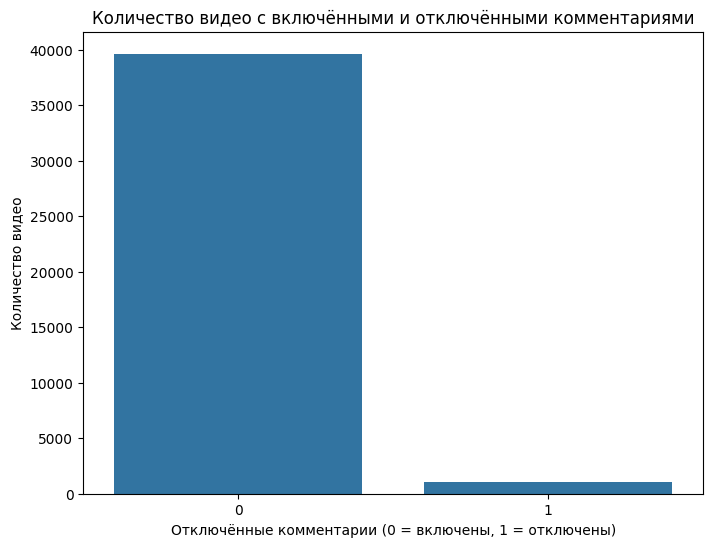

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='comments_disabled', data=df)
plt.title('Количество видео с включёнными и отключёнными комментариями')
plt.xlabel('Отключённые комментарии (0 = включены, 1 = отключены)')
plt.ylabel('Количество видео')
plt.show()


In [20]:
df.ratings_disabled.value_counts()

ratings_disabled
0    39687
1     1006
Name: count, dtype: int64

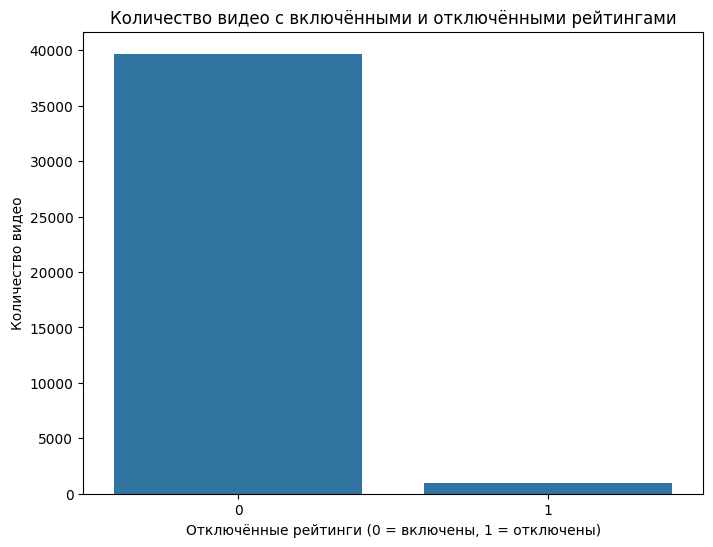

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ratings_disabled', data=df)
plt.title('Количество видео с включёнными и отключёнными рейтингами')
plt.xlabel('Отключённые рейтинги (0 = включены, 1 = отключены)')
plt.ylabel('Количество видео')
plt.show()


In [22]:
df.video_error_or_removed.value_counts()

video_error_or_removed
0    40683
1       10
Name: count, dtype: int64

Надо учесть в анализе, что доли разные! Чтобы не было странного

**Гипотеза 1 Видео с отключёнными комментариями получают больше дизлайков**

In [23]:
comments_disabled = df[df['comments_disabled'] == 1]['dislikes']
comments_enabled = df[df['comments_disabled'] == 0]['dislikes']

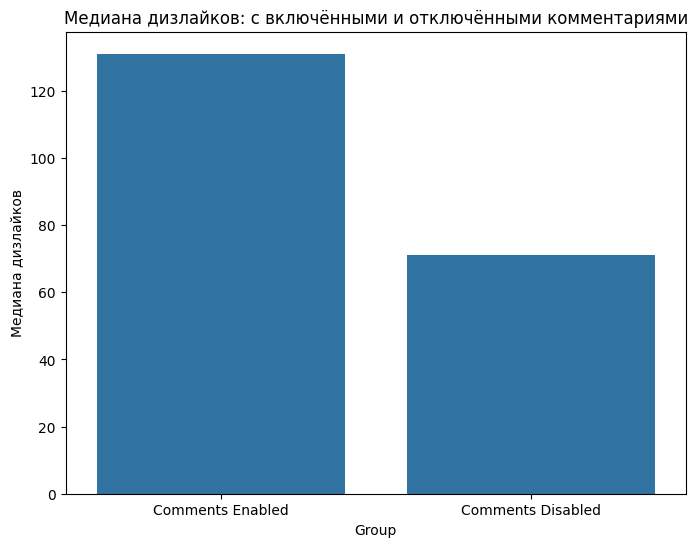

In [24]:
median_disabled = comments_disabled.median()
median_enabled = comments_enabled.median()



medians = pd.DataFrame({
    'Group': ['Comments Enabled', 'Comments Disabled'],
    'Median Dislikes': [median_enabled, median_disabled]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Median Dislikes', data=medians)
plt.title('Медиана дизлайков: с включёнными и отключёнными комментариями')
plt.ylabel('Медиана дизлайков')
plt.show()



На графике сравниваются медианные значения дизлайков для двух групп видео: с включёнными комментариями (Comments Enabled) и с отключёнными комментариями (Comments Disabled).
Медиана — это значение, которое делит данные пополам, и она менее чувствительна к выбросам и аномально высоким значениям по сравнению со средним арифметическим

На первый взгляд, видео с включёнными комментариями получают больше дизлайков. Однако это не обязательно указывает на причинно-следственную связь: отключение комментариев может происходить из-за негативной реакции зрителей, что изначально снижает число дизлайков. сделаем вот что


Можем начать с нормализации дизлайков по просмотрам для двух групп. Проверим, действительно ли отключённые комментарии приводят к разнице в дизлайках, учитывая популярность видео.

/var/folders/wy/czgqmv017lq8mh3k1t66tb680000gn/T/ipykernel_52208/2734447134.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Median Dislikes per 1000 Views', data=medians_normalized, palette='winter')


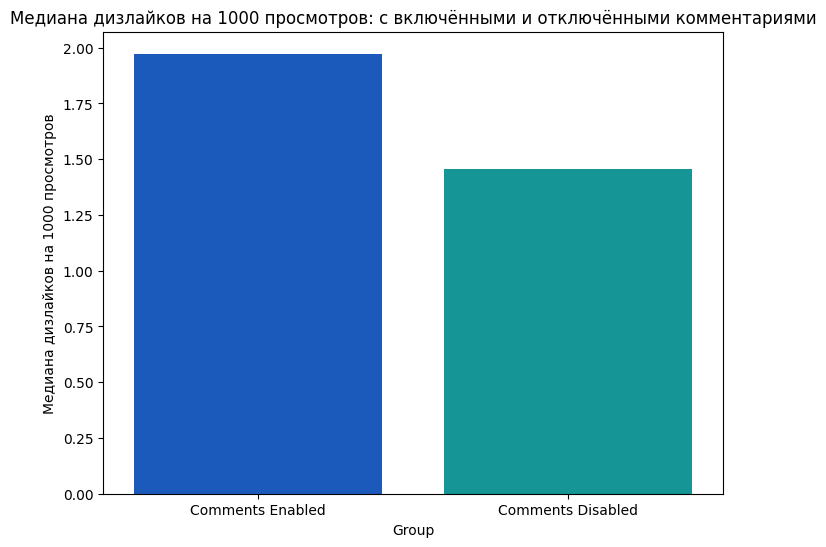

In [25]:
df['dislikes_per_1000_views'] = (df['dislikes'] / df['views']) * 1000

normalized_disabled = df[df['comments_disabled'] == 1]['dislikes_per_1000_views']
normalized_enabled = df[df['comments_disabled'] == 0]['dislikes_per_1000_views']


median_norm_disabled = normalized_disabled.median()
median_norm_enabled = normalized_enabled.median()


medians_normalized = pd.DataFrame({
    'Group': ['Comments Enabled', 'Comments Disabled'],
    'Median Dislikes per 1000 Views': [median_norm_enabled, median_norm_disabled]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Median Dislikes per 1000 Views', data=medians_normalized, palette='winter')
plt.title('Медиана дизлайков на 1000 просмотров: с включёнными и отключёнными комментариями')
plt.ylabel('Медиана дизлайков на 1000 просмотров')
plt.show()



Видео с включёнными комментариями получают больше дизлайков на 1000 просмотров по сравнению с видео с отключёнными комментариями. Однако нормализовав, мы видим, что медиана дизлайков с выключенными комментариями стала чуть выше относительно медианы с включенными комментариями

Возможно комментарии могли быть отключены из-за негативной реакции, а дизлайки продолжали накапливаться.



2 **Видео с отключёнными оценками имеют меньшее количество просмотров
Проверим, влияет ли отключение лайков и дизлайков на число просмотров видео.**

/var/folders/wy/czgqmv017lq8mh3k1t66tb680000gn/T/ipykernel_52208/3662964171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_disabled', y='views', data=grouped_medians, palette='rocket')


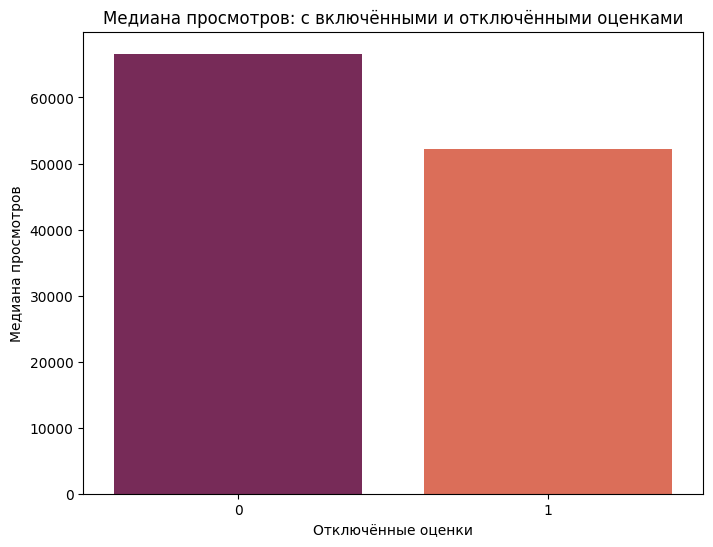

In [26]:
grouped_medians = df.groupby(['ratings_disabled'])['views'].median().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='ratings_disabled', y='views', data=grouped_medians, palette='rocket')
plt.title('Медиана просмотров: с включёнными и отключёнными оценками')
plt.xlabel('Отключённые оценки')
plt.ylabel('Медиана просмотров')
plt.show()





Видео с отключёнными оценками действительно получают меньшее количество просмотров по сравнению с видео, где оценки включены. Разница в медиане значима (~15,000 просмотров).


Возможно отключение лайков и дизлайков снижает активность пользователей, что негативно влияет на распространение видео в алгоритмах рекомендаций.



Гипотеза подтверждается: отключение лайков и дизлайков связано с меньшим числом просмотров.



**3 Видео, опубликованные вечером, попадают в тренды быстрее, чем видео, опубликованные вечером или ночью.**

/var/folders/wy/czgqmv017lq8mh3k1t66tb680000gn/T/ipykernel_52208/2187465027.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='time_to_trend', data=median_time_to_trend, palette='summer')


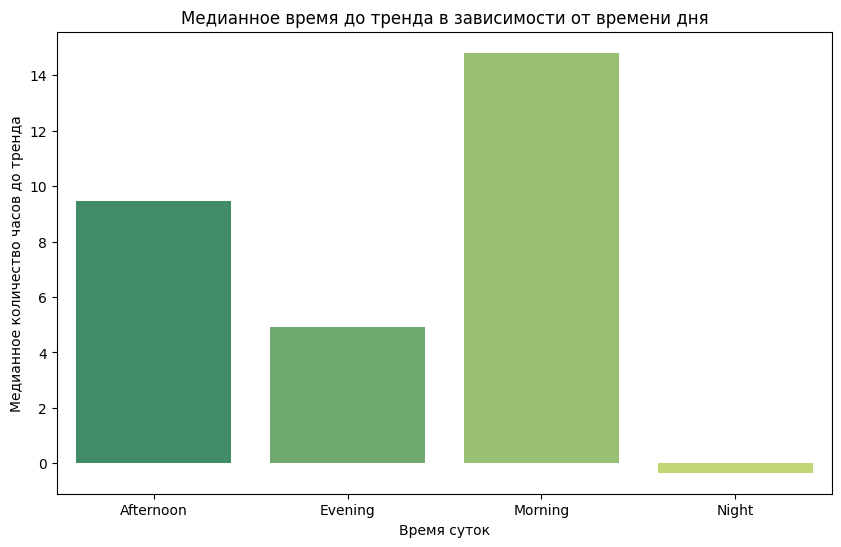

In [27]:
def classify_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['trending_date'] = df['trending_date'].dt.tz_localize(None)
df['publish_time'] = df['publish_time'].dt.tz_localize(None)

df['time_to_trend'] = (df['trending_date'] - df['publish_time']).dt.total_seconds() / 3600


df['time_of_day'] = df['publish_time'].dt.hour.apply(classify_time_of_day)


median_time_to_trend = df.groupby('time_of_day')['time_to_trend'].median().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='time_to_trend', data=median_time_to_trend, palette='summer')
plt.title('Медианное время до тренда в зависимости от времени дня')
plt.xlabel('Время суток')
plt.ylabel('Медианное количество часов до тренда')
plt.show()



In [28]:
median_time_to_trend

,time_of_day,time_to_trend
0,Afternoon,9.449722
1,Evening,4.903333
2,Morning,14.814306
3,Night,-0.341111


Видео, опубликованные вечером, имеют наибольший шанс быстро попасть в тренды. Это может быть связано с активностью зрителей в вечерние часы.

Гипотеза "Видео, опубликованные вечером, попадают в тренды быстрее" была проверена и не может быть опровергнутой!

In [29]:
df

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,dislikes_per_1000_views,time_to_trend,time_of_day
0,gDuslQ9avLc,2017-11-14,22,2017-11-13 09:09:31,62408,334,190,50,0,0,0,3.044481,14.841389,Morning
1,AOCJIFEA_jE,2017-11-14,22,2017-11-13 17:32:11,330043,43841,2244,2977,0,0,0,6.799114,6.463611,Afternoon
2,VAWNQDgwwOM,2017-11-14,24,2017-11-13 16:11:31,424596,49854,714,2944,0,0,0,1.681599,7.808056,Afternoon
3,gknkFwKQfHg,2017-11-14,22,2017-11-13 06:51:10,112851,3566,122,80,0,0,0,1.081072,17.147222,Morning
4,3sYvZcwzZr8,2017-11-14,24,2017-11-13 16:52:36,243469,36216,631,1692,0,0,0,2.591706,7.123333,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,2018-06-14,22,2018-06-13 13:47:01,129488,5893,164,990,0,0,0,1.266527,10.216389,Afternoon
40735,tX7p7NtNVDE,2018-06-14,23,2018-06-12 09:38:38,99163,4659,337,692,0,0,0,3.398445,38.356111,Morning
40736,KAyj5Xm1C64,2018-06-14,24,2018-06-13 12:51:23,449611,24808,93,974,0,0,0,0.206845,11.143611,Afternoon
40737,4PiSLIrsSiY,2018-06-14,22,2018-06-13 00:23:33,14225,793,39,209,0,0,0,2.741652,23.607500,Night


4 Видео, опубликованные в выходные, получают больше просмотров

/var/folders/wy/czgqmv017lq8mh3k1t66tb680000gn/T/ipykernel_52208/1632299778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='views', data=weekend_views, palette='autumn')


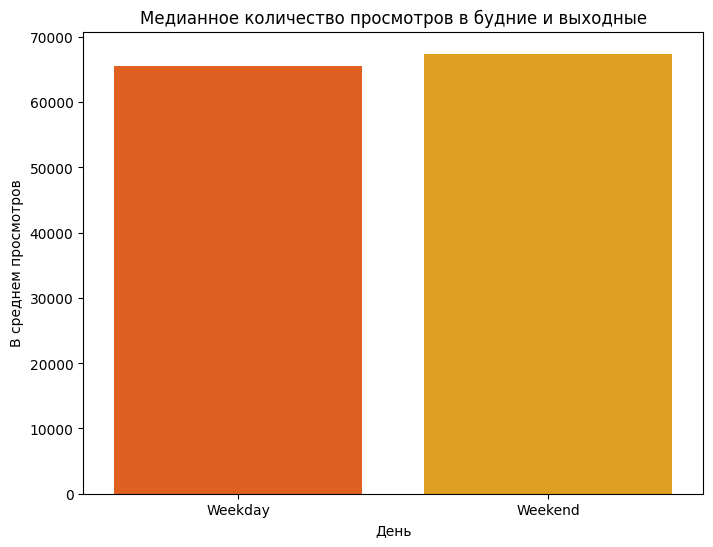

In [30]:
df['publish_day'] = df['publish_time'].dt.dayofweek

df['is_weekend'] = df['publish_day'].apply(lambda x: 1 if x >= 5 else 0)

weekend_views = df.groupby('is_weekend')['views'].median().reset_index()

weekend_views['is_weekend'] = weekend_views['is_weekend'].replace({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(8, 6))
sns.barplot(x='is_weekend', y='views', data=weekend_views, palette='autumn')
plt.title('Медианное количество просмотров в будние и выходные')
plt.xlabel('День')
plt.ylabel('В среднем просмотров')
plt.show()



In [31]:
df

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,dislikes_per_1000_views,time_to_trend,time_of_day,publish_day,is_weekend
0,gDuslQ9avLc,2017-11-14,22,2017-11-13 09:09:31,62408,334,190,50,0,0,0,3.044481,14.841389,Morning,0,0
1,AOCJIFEA_jE,2017-11-14,22,2017-11-13 17:32:11,330043,43841,2244,2977,0,0,0,6.799114,6.463611,Afternoon,0,0
2,VAWNQDgwwOM,2017-11-14,24,2017-11-13 16:11:31,424596,49854,714,2944,0,0,0,1.681599,7.808056,Afternoon,0,0
3,gknkFwKQfHg,2017-11-14,22,2017-11-13 06:51:10,112851,3566,122,80,0,0,0,1.081072,17.147222,Morning,0,0
4,3sYvZcwzZr8,2017-11-14,24,2017-11-13 16:52:36,243469,36216,631,1692,0,0,0,2.591706,7.123333,Afternoon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,2018-06-14,22,2018-06-13 13:47:01,129488,5893,164,990,0,0,0,1.266527,10.216389,Afternoon,2,0
40735,tX7p7NtNVDE,2018-06-14,23,2018-06-12 09:38:38,99163,4659,337,692,0,0,0,3.398445,38.356111,Morning,1,0
40736,KAyj5Xm1C64,2018-06-14,24,2018-06-13 12:51:23,449611,24808,93,974,0,0,0,0.206845,11.143611,Afternoon,2,0
40737,4PiSLIrsSiY,2018-06-14,22,2018-06-13 00:23:33,14225,793,39,209,0,0,0,2.741652,23.607500,Night,2,0


Разницы почти нет. Построим по категориям

In [32]:
category_weekend_views = df.groupby(['is_weekend', 'category_id'])['views'].median().reset_index()

category_weekend_pivot = category_weekend_views.pivot(index='category_id', columns='is_weekend', values='views')
category_weekend_pivot


is_weekend,0,1
category_id,,
1,54797.0,60460.0
2,120867.0,118893.0
10,191093.0,103074.0
15,26225.0,25363.0
17,79988.0,93242.0
19,27709.5,49521.0
20,78447.5,75346.0
22,37884.0,39837.0
23,141658.0,126798.0


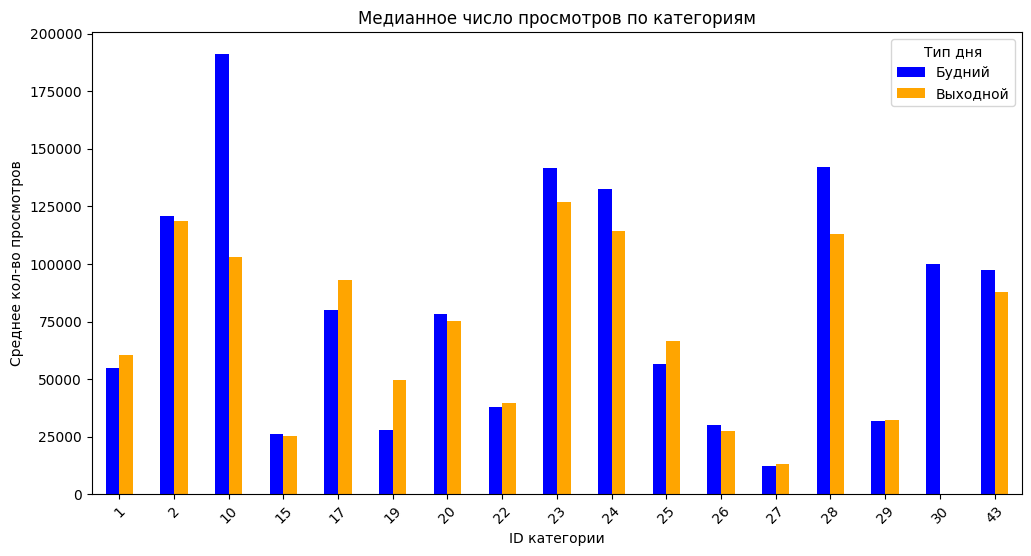

In [33]:
category_weekend_pivot.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title('Медианное число просмотров по категориям')
plt.xlabel('ID категории')
plt.ylabel('Среднее кол-во просмотров')
plt.legend(title='Тип дня', labels=['Будний', 'Выходной'])
plt.xticks(rotation=45)
plt.show()

Гипотеза "Видео, опубликованные в выходные, получают больше просмотров" не подтверждается, результат зависит от категории видео. Есть категории, где просмотры действительно выше на выходныхю

5 Чем выше доля дизлайков от общего числа реакций (лайков и дизлайков), тем меньше просмотров у видео.

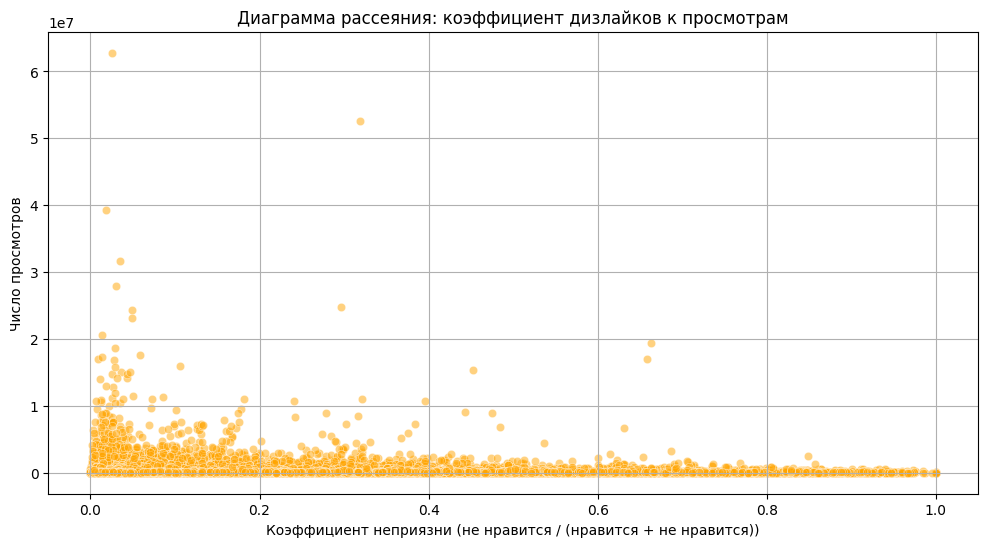

In [34]:
df['dislike_perc'] = df['dislikes'] / (df['likes'] + df['dislikes'])


plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='dislike_perc',
    y='views',
    data=df,
    alpha=0.5,
    color='orange'
)
plt.title('Диаграмма рассеяния: коэффициент дизлайков к просмотрам')
plt.xlabel('Коэффициент неприязни (не нравится / (нравится + не нравится))')
plt.ylabel('Число просмотров')
plt.grid()
plt.show()



как будто есть что-то, что у видео, у которого малое кол-во dislike ratio, просмотров побольше

In [35]:
df[['dislike_perc', 'views']].corr()

,dislike_perc,views
dislike_perc,1.000000,-0.011739
views,-0.011739,1.000000


благодаря формуле мы исключили связь просмотров, оставив именно долю дизлайков математически. Тепреь видим что небольшой откос есть и слабая корреляция присутствует. Мы не можем принять эту гипотезу, так как корреляция мала